In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU, Dropout
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

/Users/madinamukhambekova/opt/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/madinamukhambekova/opt/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/madinamukhambekova/opt/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#normalize input data
# x_norm=normalize(x_train)

In [4]:
# Step 1
# Build a Dense ANN with five hidden layers of 25 neurons each
m = Sequential()
m.add(Flatten(input_shape=(28, 28)))
m.add(Dense(units=25, activation='relu'))
m.add(BatchNormalization())
m.add(Dense(units=25, activation='relu'))
m.add(BatchNormalization())
# m.add(Dense(units=25, activation='relu'))
# m.add(BatchNormalization())
# m.add(Dense(units=25, activation='relu'))
# m.add(BatchNormalization())
# m.add(Dense(units=25, activation='relu'))
# m.add(BatchNormalization())
# m.add(Dropout(0.5))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
# Add a softmax output layer with ten neurons
m.add(Dense(units=10, activation='softmax'))

In [6]:
# Step 2
# Train the model with optimizer='adam'
m.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [7]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 25)                19625     
_________________________________________________________________
batch_normalization (BatchNo (None, 25)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
batch_normalization_1 (Batch (None, 25)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
Total params: 20,735
Trainable params: 20,635
Non-trainable params: 100
__________________________________________________

In [8]:
# Use a batch size of at least 500. Run 100 epochs.
h= m.fit(x_train, to_categorical(y_train), epochs=50, validation_split=0.2, batch_size=100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 65us/sample - loss: 0.5135 - acc: 0.8597 - val_loss: 0.2358 - val_acc: 0.9337
Epoch 2/50
48000/48000 [==============================] - 3s 59us/sample - loss: 0.2160 - acc: 0.9379 - val_loss: 0.1810 - val_acc: 0.9452
Epoch 3/50
48000/48000 [==============================] - 3s 59us/sample - loss: 0.1666 - acc: 0.9512 - val_loss: 0.1663 - val_acc: 0.9491
Epoch 4/50
48000/48000 [==============================] - 3s 56us/sample - loss: 0.1440 - acc: 0.9571 - val_loss: 0.1491 - val_acc: 0.9548
Epoch 5/50
48000/48000 [==============================] - 3s 59us/sample - loss: 0.1279 - acc: 0.9615 - val_loss: 0.1438 - val_acc: 0.9553
Epoch 6/50
48000/48000 [==============================] - 3s 71us/sample - loss: 0.1136 - acc: 0.9650 - val_loss: 0.1502 - val_acc: 0.9539
Epoch 7/50
48000/48000 [==============================] - 3s 55us/sample - loss: 0.1051 - acc: 0.9687 - val_loss: 0.

In [9]:
# What accuracy do you reach?
print(sum(h.history['loss'])/len(h.history['loss']))
print(sum(h.history['val_loss'])/len(h.history['val_loss']))

0.06809701461365819
0.15218365473839607


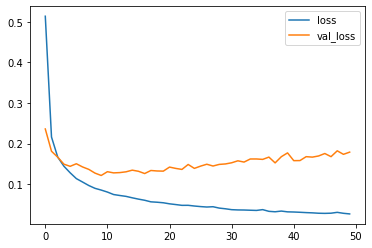

In [10]:
# Is the network overfitting?
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [11]:
# Step 3
# Add Early Stopping. After how many epochs does it stop?
# stopping = EarlyStopping(min_delta=0.02, patience=10)
# h= m.fit(x_norm, to_categorical(y_train), epochs=100, validation_split=0.2, batch_size=500,callbacks=[stopping])

In [12]:
# Step 4
# Add Batch Normalization to every layer.
# Compare the learning curves: is it converging faster than before?
# Is it still overfitting?

In [13]:
score = m.evaluate(x_train, to_categorical(y_train), batch_size=100)
print(score)

60000/60000 [==============================] - 1s 13us/sample - loss: 0.0462 - acc: 0.9891
[0.04624756992222198, 0.98906666]


In [14]:
# prediction on new data points
print(m.predict(x_train[:10]))

[[7.82735629e-16 7.81393630e-11 3.37243927e-10 1.52131499e-04
  4.00396764e-11 9.99847889e-01 3.47490751e-11 6.36403064e-09
  5.40694713e-13 8.91161589e-11]
 [9.99933004e-01 4.45055859e-09 6.69823494e-05 1.71130321e-09
  7.49599582e-09 2.86477331e-09 6.10541946e-08 8.33569380e-10
  2.45753151e-09 1.06334885e-09]
 [4.76787765e-09 3.40616202e-09 6.19562068e-10 1.29150308e-08
  9.99974251e-01 6.41902547e-13 5.53354099e-11 1.03450970e-10
  1.44300519e-13 2.57906304e-05]
 [4.40510561e-08 9.99995470e-01 3.46189466e-07 1.96512090e-07
  2.09784375e-07 3.67922759e-08 3.79590332e-08 8.70896486e-07
  2.31927424e-06 5.48356297e-07]
 [5.28722899e-12 1.15080825e-08 8.21160834e-15 3.46281183e-07
  6.87785118e-08 6.11125550e-09 2.58586360e-12 7.21296055e-06
  2.45858733e-09 9.99992371e-01]
 [1.22499932e-09 9.05865747e-08 9.99985814e-01 1.29628424e-05
  1.02648380e-06 4.33219718e-08 9.41049213e-13 6.56518662e-09
  1.20386616e-08 9.55830437e-09]
 [8.42705354e-14 9.99996066e-01 5.07433828e-09 3.11475503e

In [15]:
pred_bin = m.predict(x_test[:10])

In [16]:
pred = [np.argmax(p) for p in pred_bin]

In [17]:
print(pred, y_test[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9] [7 2 1 0 4 1 4 9 5 9]
